In [17]:
#Carregando Dados Tratados
import pandas as pd

data = pd.read_excel("Dados Tratados.xlsx")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 153 entries, index to col_163_APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:S
dtypes: bool(6), float64(5), int64(142)
memory usage: 52.4 MB


In [18]:
# Calcular a correlação da coluna "alvo" com as demais
correlacao_alvo = data.corr()['alvo'].sort_values(ascending=False)

# Exibir a correlação da coluna "alvo" com as demais
print(f"Correlação da coluna 'alvo' com as demais colunas:\n{correlacao_alvo}")

Correlação da coluna 'alvo' com as demais colunas:
alvo           1.000000
col_173        0.029821
dia            0.026159
col_197        0.024897
col_193        0.023852
                 ...   
col_185       -0.022895
col_196       -0.022981
col_194       -0.023665
col_199       -0.024663
DIAS_ATRASO   -0.050580
Name: alvo, Length: 153, dtype: float64


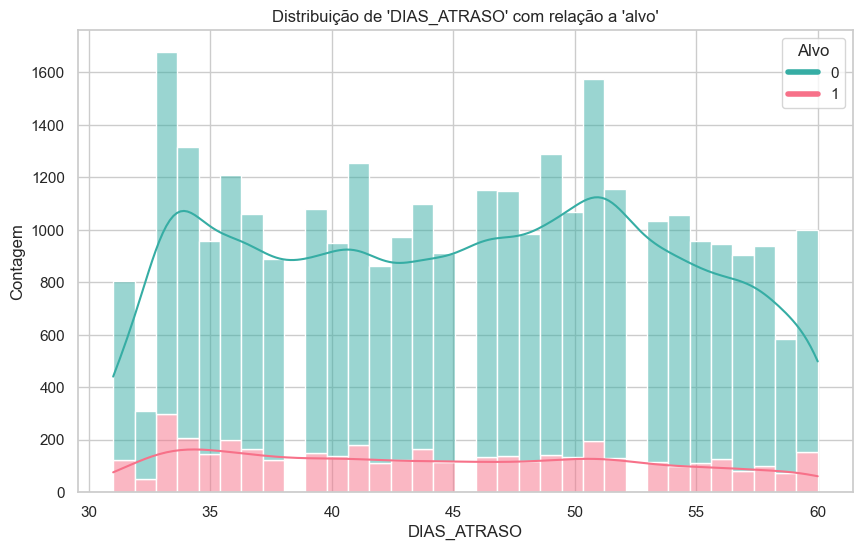

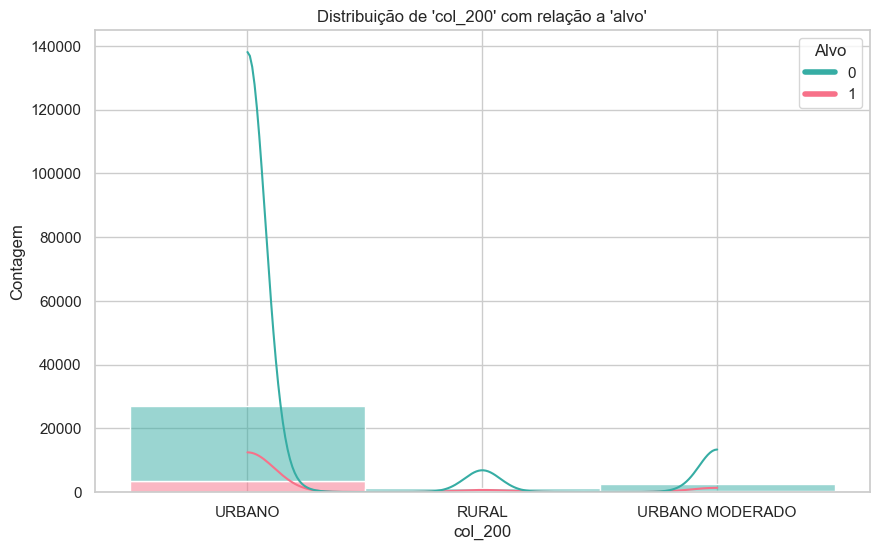

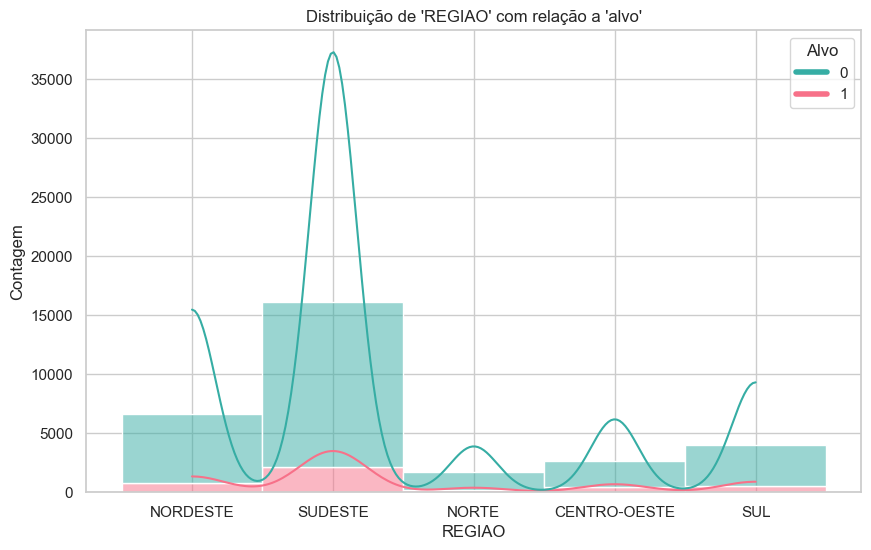

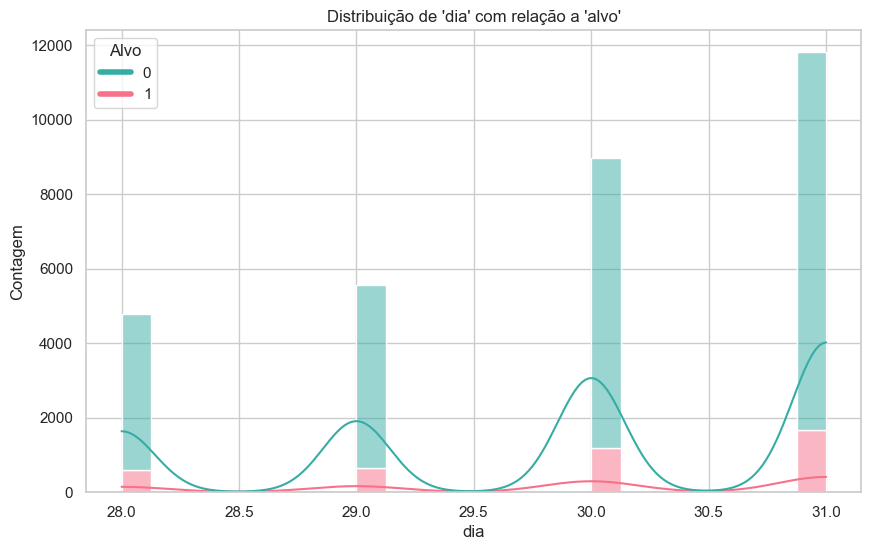

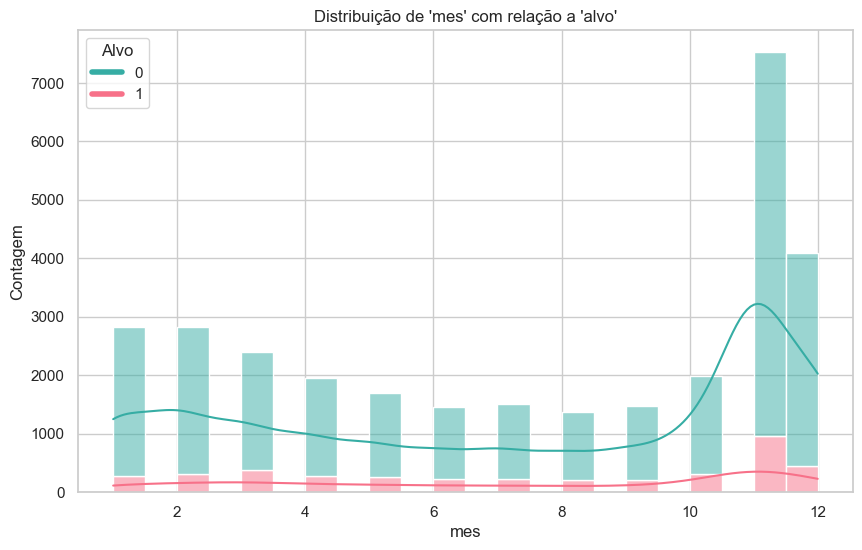

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
analise = pd.read_excel("Dados.xlsx")

# Remover dados ausentes
analise_limpo = analise.dropna()

# Definir as colunas para análise
colunas_para_analisar = ["DIAS_ATRASO", "col_200", "REGIAO", "dia", "mes"]

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Obter valores únicos da coluna 'alvo'
valores_unicos_alvo = analise_limpo['alvo'].unique()
# Criar uma paleta de cores com base no número de valores únicos em 'alvo'
paleta_cores = sns.color_palette("husl", len(valores_unicos_alvo))[::-1]
# Criar um dicionário para mapear valores de 'alvo' para cores
mapa_cores = dict(zip(valores_unicos_alvo, paleta_cores))

# Criar gráficos de distribuição
for coluna in colunas_para_analisar:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=analise_limpo, x=coluna, hue='alvo', palette=mapa_cores, multiple="stack", kde=True)
    plt.title(f"Distribuição de '{coluna}' com relação a 'alvo'")
    plt.xlabel(coluna)
    plt.ylabel("Contagem")
    
    # Criar a legenda manualmente
    handles = [plt.Line2D([0], [0], color=mapa_cores[val], lw=4) for val in valores_unicos_alvo]
    labels = [str(val) for val in valores_unicos_alvo]

    ax.legend(handles=handles, labels=labels, title='Alvo')
    
    plt.show()